#**Task 2: Predict Future Stock Prices (Short-Term)**

**Objective:**

Use historical stock data to predict the next day&#39;s closing price.

**Dataset:**

Stock market data from Yahoo Finance (retrieved using the yfinance Python library)

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Download data from 2020 to today (Nov 20, 2025)
data = yf.download('AAPL', start='2020-01-01', end='2025-11-20')

/tmp/ipython-input-335535204.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2020-01-01', end='2025-11-20')
[*********************100%***********************]  1 of 1 completed


In [ ]:
s_df=data.copy()

In [ ]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.468262,72.528582,71.223259,71.476600,135480400
2020-01-03,71.763733,72.523762,71.539345,71.696175,146322800
2020-01-06,72.335548,72.374154,70.634532,70.885464,118387200
2020-01-07,71.995346,72.600952,71.775781,72.345197,108872000
2020-01-08,73.153503,73.455103,71.698589,71.698589,132079200


In [ ]:
s_df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.468262,72.528582,71.223259,71.476600,135480400
2020-01-03,71.763733,72.523762,71.539345,71.696175,146322800
2020-01-06,72.335548,72.374154,70.634532,70.885464,118387200
2020-01-07,71.995346,72.600952,71.775781,72.345197,108872000
2020-01-08,73.153503,73.455103,71.698589,71.698589,132079200


##**Use features like Open, High, Low, and Volume to predict the next Close price.**

In [ ]:
s_df.columns = s_df.columns.get_level_values(0)

In [ ]:
s_df =s_df.sort_index()

In [ ]:
s_df['Next_Close'] = s_df['Close'].shift(-1)  # Tomorrow's Close


In [ ]:
s_df=s_df.dropna()  # Remove last row (no "next day")

In [ ]:
s_df.tail()

Price,Close,High,Low,Open,Volume,Next_Close
Date,,,,,,
2025-11-12,273.470001,275.730011,271.700012,275.000000,48398000,272.950012
2025-11-13,272.950012,276.700012,272.089996,274.109985,49602800,272.410004
2025-11-14,272.410004,275.959991,269.600006,271.049988,47431300,267.459991
2025-11-17,267.459991,270.489990,265.730011,268.820007,45018300,267.440002
2025-11-18,267.440002,270.709991,265.320007,269.989990,45677300,268.559998


In [ ]:
s_df.shape

(1479, 6)

In [ ]:
s_df.dtypes

,0
Price,
Close,float64
High,float64
Low,float64
Open,float64
Volume,int64
Next_Close,float64


In [ ]:
s_df.isnull().sum()

,0
Price,
Close,0
High,0
Low,0
Open,0
Volume,0
Next_Close,0


In [ ]:
data.isnull().sum()

,,0
Price,Ticker,
Close,AAPL,0
High,AAPL,0
Low,AAPL,0
Open,AAPL,0
Volume,AAPL,0


In [ ]:
s_df.describe()

Price,Close,High,Low,Open,Volume,Next_Close
count,1479.000000,1479.000000,1479.000000,1479.000000,1.479000e+03,1479.000000
mean,162.770561,164.443696,160.927404,162.610445,8.535932e+07,162.903145
std,47.694719,47.978103,47.350715,47.650762,5.142838e+07,47.716071
min,54.264328,55.263178,51.420150,55.161600,2.323470e+07,54.264328
25%,130.894707,132.147380,129.770258,131.020546,5.136690e+07,130.983620
50%,162.460526,164.068725,160.625327,162.305252,7.105760e+07,162.551254
75%,193.103455,194.812676,191.753308,193.295864,1.015119e+08,193.216003
max,275.250000,277.051436,272.089996,276.721738,4.265100e+08,275.250000


##**EDA**

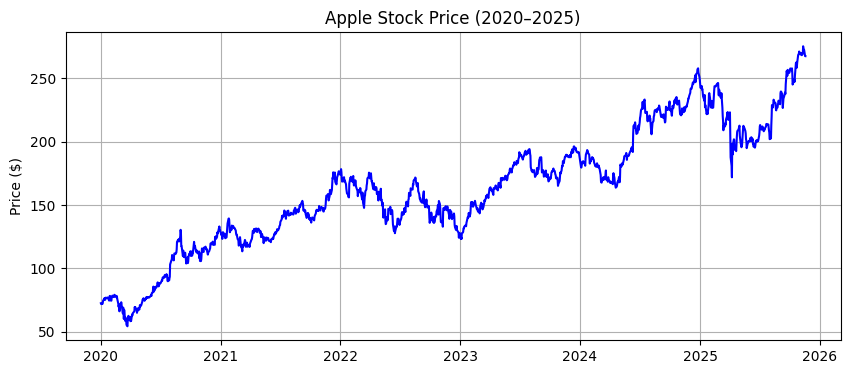

In [ ]:
# 1. Price Trend (Is it going up?)
plt.figure(figsize=(10, 4))
plt.plot(s_df['Close'], color='blue')
plt.title("Apple Stock Price (2020–2025)")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()


In [ ]:
# 2. Average Daily Change
avg_change = (s_df['Close'].pct_change() * 100).mean()
print(f"Average daily return: {avg_change:.3f}%")


Average daily return: 0.109%


In [ ]:
# 3. Biggest Up & Down Days
returns = s_df['Close'].pct_change()
max_up = returns.max() * 100
max_down = returns.min() * 100
print(f"Biggest single-day gain: +{max_up:.2f}%")
print(f"Biggest single-day drop: {max_down:.2f}%")


Biggest single-day gain: +15.33%
Biggest single-day drop: -12.86%


In [ ]:
# 4. Is today's close similar to tomorrow's? (Check correlation)
corr = s_df['Close'].corr(s_df['Next_Close'])
print(f"Today's Close vs Tomorrow's Close correlation: {corr:.4f}")


Today's Close vs Tomorrow's Close correlation: 0.9980


In [ ]:
# 5. Volume vs Price: Does high volume mean big move?
s_df['abs_return'] = returns.abs()
vol_corr = s_df['Volume'].corr(s_df['abs_return'])
print(f"Volume vs |Price Change| correlation: {vol_corr:.3f}")


Volume vs |Price Change| correlation: 0.525


In [ ]:
# Last 5 days
print("Bonus: Last 5 closing prices:")
print(s_df['Close'].tail())

Bonus: Last 5 closing prices:
Date
2025-11-12    273.470001
2025-11-13    272.950012
2025-11-14    272.410004
2025-11-17    267.459991
2025-11-18    267.440002
Name: Close, dtype: float64


##**Linear Regression & Random Forest model Training**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:

# 2. Features and target
X = s_df[['Open', 'High', 'Low', 'Volume']]
y = s_df['Next_Close']


In [ ]:
X.head()

Price,Open,High,Low,Volume
Date,,,,
2020-01-02,71.476600,72.528582,71.223259,135480400
2020-01-03,71.696175,72.523762,71.539345,146322800
2020-01-06,70.885464,72.374154,70.634532,118387200
2020-01-07,72.345197,72.600952,71.775781,108872000
2020-01-08,71.698589,73.455103,71.698589,132079200


In [ ]:
y.head()

,Next_Close
Date,
2020-01-02,71.763733
2020-01-03,72.335548
2020-01-06,71.995346
2020-01-07,73.153503
2020-01-08,74.707344


In [ ]:
# 3. Chronological train/test split (last 250 days = test)
n_test = 250
X_train, X_test = X.iloc[:-n_test], X.iloc[-n_test:]
y_train, y_test = y.iloc[:-n_test], y.iloc[-n_test:]


In [ ]:
X_train.shape

(1229, 4)

In [ ]:
X_test.shape

(250, 4)

In [ ]:
# 4. Train model (Random Forest - NO scaling needed)
model1 = RandomForestRegressor(n_estimators=100, random_state=42)
model1.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# 5. Predict
y_pred1 = model1.predict(X_test)

In [ ]:
# 6. Evaluate
mae = mean_absolute_error(y_test, y_pred1)
rmse = np.sqrt(mean_squared_error(y_test, y_pred1))
print(f" MAE: ${mae:.2f}")
print(f" RMSE: ${rmse:.2f}")


 MAE: $9.90
 RMSE: $14.20


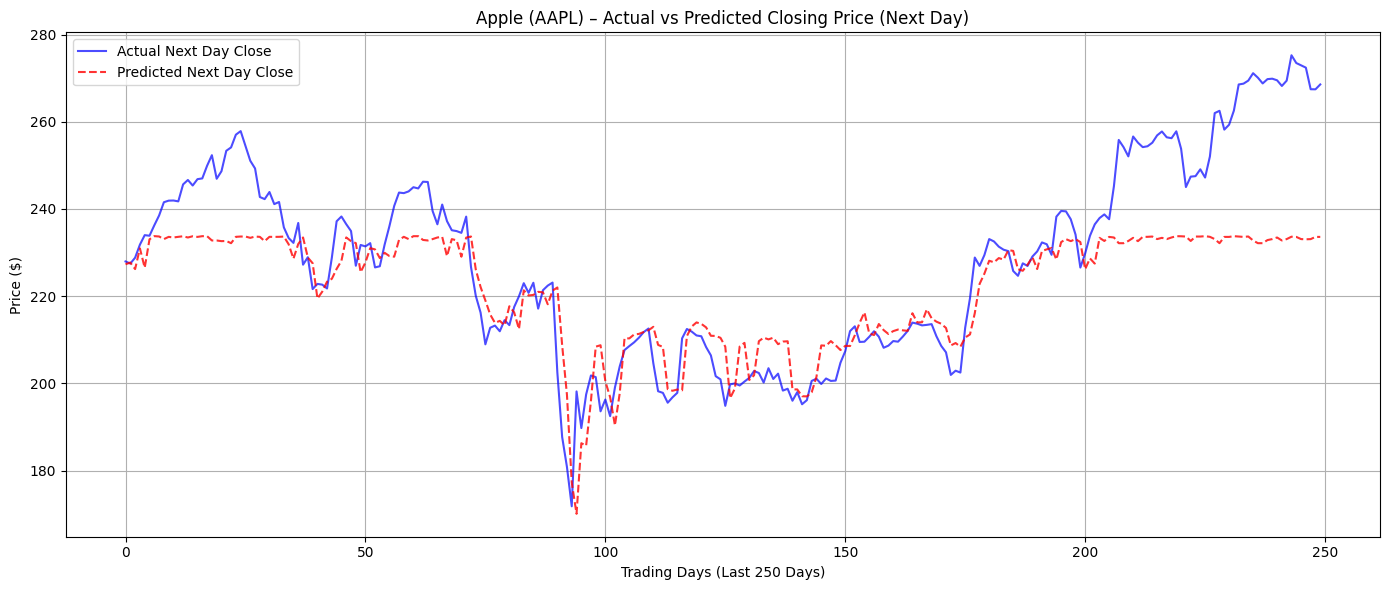

In [ ]:

# 7. Plot: Actual vs Predicted
plt.figure(figsize=(14, 6))
plt.plot(y_test.values, label='Actual Next Day Close', color='blue', alpha=0.7)
plt.plot(y_pred1, label='Predicted Next Day Close', color='red', linestyle='--', alpha=0.8)
plt.title('Apple (AAPL) – Actual vs Predicted Closing Price (Next Day)')
plt.xlabel('Trading Days (Last 250 Days)')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

###  **Plot Interpretation**
- **RF plot**: Jagged, sometimes lags or overshoots → less stable.
- Both plots show general alignment — no wild deviations.

In [ ]:

# 4. Train Linear Regression model (NO scaling needed for correctness)
model2 = LinearRegression()
model2.fit(X_train, y_train)


LinearRegression()

In [ ]:

# 5. Predict
y_pred2 = model2.predict(X_test)


In [ ]:
# 6. Evaluate
mae = mean_absolute_error(y_test, y_pred2)
rmse = np.sqrt(mean_squared_error(y_test, y_pred2))
print(f" Linear Regression - MAE: ${mae:.2f}")
print(f" Linear Regression - RMSE: ${rmse:.2f}")


 Linear Regression - MAE: $3.10
 Linear Regression - RMSE: $4.53


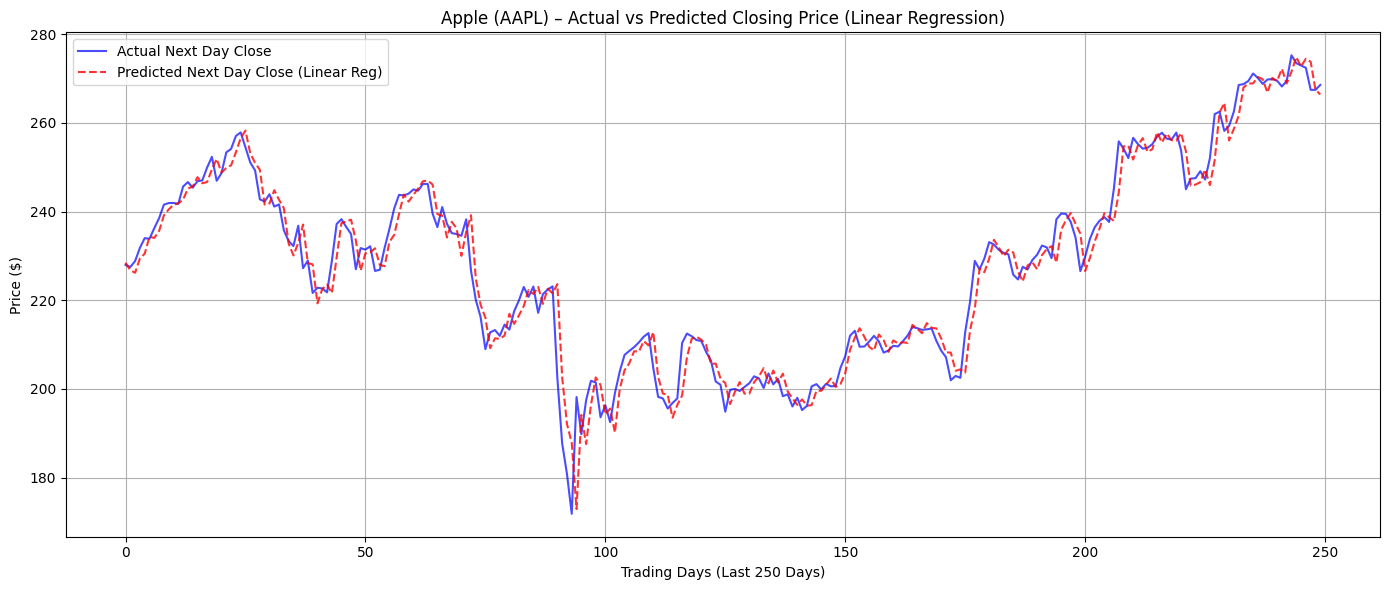

In [ ]:

# 7. Plot: Actual vs Predicted
plt.figure(figsize=(14, 6))
plt.plot(y_test.values, label='Actual Next Day Close', color='blue', alpha=0.7)
plt.plot(y_pred2, label='Predicted Next Day Close (Linear Reg)', color='red', linestyle='--', alpha=0.8)
plt.title('Apple (AAPL) – Actual vs Predicted Closing Price (Linear Regression)')
plt.xlabel('Trading Days (Last 250 Days)')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

###  **Plot Interpretation**
- **LR plot**: Smooth red line follows blue tightly → captures trend well.
- Both plots show general alignment — no wild deviations.


In [ ]:
# Get last day's features (2025-11-19)
last_day_features = s_df[['Open', 'High', 'Low', 'Volume']].iloc[-1].values.reshape(1, -1)

# Predict next day (2025-11-20) with Linear Regression
next_close_lr = model2.predict(last_day_features)[0]

print(f" Linear Regression Prediction for 2025-11-20: ${next_close_lr:.2f}")

 Linear Regression Prediction for 2025-11-20: $266.41


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Optional: Also predict with Random Forest
next_close_rf = model1.predict(last_day_features)[0]
print(f" Random Forest Prediction for 2025-11-20: ${next_close_rf:.2f}")

 Random Forest Prediction for 2025-11-20: $233.60


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
# Install required libraries (run this first)
!pip install streamlit

In [ ]:
# Force reinstall latest pyngrok (v7+)
!pip uninstall pyngrok -y
!pip install pyngrok==7.1.0

Found existing installation: pyngrok 7.5.0
Uninstalling pyngrok-7.5.0:
  Successfully uninstalled pyngrok-7.5.0


In [ ]:
%%writefile app.py
import streamlit as st
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
# 🎨 Page Config & Styling
st.set_page_config(
    page_title="📈 Stock Price Predictor",
    page_icon="📉",
    layout="centered"
)

# ... (rest of your full app code from previous message) ...

# Custom CSS for clean, professional look
st.markdown("""
    <style>
    /* Background and text */
    .main {
        background-color: #ffffff;
    }
    h1 {
        color: #0d47a1;
        font-family: 'Segoe UI', sans-serif;
        text-align: center;
        margin-bottom: 5px;
    }
    h2 {
        color: #1565c0;
        font-family: 'Segoe UI', sans-serif;
        margin-top: 30px;
    }
    h3 {
        color: #1976d2;
        font-family: 'Segoe UI', sans-serif;
    }
    .stButton>button {
        background-color: #1976d2;
        color: white;
        border-radius: 8px;
        padding: 10px 20px;
        font-weight: bold;
    }
    .stButton>button:hover {
        background-color: #0d47a1;
        color: white;
    }
    footer {
        visibility: hidden;
    }
    </style>
""", unsafe_allow_html=True)

# ----------------------------
# 🧠 App Logic
# ----------------------------

# Title
st.title("📈 Next-Day Stock Price Predictor")
st.markdown(
    "<div style='text-align: center; color: #546e7a;'>"
    "Predict tomorrow's closing price using today's market data</div>",
    unsafe_allow_html=True
)

# Sidebar for stock selection
st.sidebar.header("🔧 Settings")
symbol = st.sidebar.text_input("Stock Symbol", value="AAPL").upper()
start_date = st.sidebar.date_input("Start Date", value=pd.to_datetime("2020-01-01"))
end_date = st.sidebar.date_input("End Date", value=pd.to_datetime("2025-11-19"))

# Predict button
if st.sidebar.button("🔮 Predict Next Day"):
    try:
        # Fetch data
        data = yf.download(symbol, start=start_date, end=end_date)
        if data.empty:
            st.error("❌ No data found for this symbol. Try AAPL, TSLA, MSFT, etc.")
        else:
            df = data.copy()
            df.columns = df.columns.get_level_values(0)
            df = df.sort_index()

            # Create target
            df['Next_Close'] = df['Close'].shift(-1)
            df = df.dropna()

            if len(df) < 100:
                st.warning("⚠️ Not enough data. Try a longer date range.")
            else:
                # Prepare features
                X = df[['Open', 'High', 'Low', 'Volume']]
                y = df['Next_Close']

                # Train Linear Regression
                model = LinearRegression()
                model.fit(X, y)

                # Predict last day
                last_features = X.iloc[-1:].values
                pred_price = model.predict(last_features)[0]
                actual_last = df['Close'].iloc[-1]

                # Display results
                st.success(f"✅ **Predicted closing price for {symbol} on next trading day**: ${pred_price:.2f}")
                st.info(f"ℹ️ Last known closing price: ${actual_last:.2f}")

                # Show metrics (on full test set)
                n_test = min(250, len(df) // 4)
                X_test, y_test = X.iloc[-n_test:], y.iloc[-n_test:]
                y_pred = model.predict(X_test)
                mae = np.mean(np.abs(y_test - y_pred))
                st.metric("📊 Model MAE (Last 250 Days)", f"${mae:.2f}")

                # Plot
                st.subheader("📉 Actual vs Predicted (Last 250 Days)")
                fig, ax = plt.subplots(figsize=(10, 4))
                ax.plot(y_test.values, label="Actual", color="#1976d2")
                ax.plot(y_pred, label="Predicted", color="#d32f2f", linestyle="--")
                ax.set_xlabel("Days")
                ax.set_ylabel("Price ($)")
                ax.legend()
                ax.grid(True, linestyle='--', alpha=0.6)
                st.pyplot(fig)

                # Feature weights
                st.subheader("🔍 Feature Impact (Coefficients)")
                coef_df = pd.DataFrame({
                    'Feature': ['Open', 'High', 'Low', 'Volume'],
                    'Coefficient': model.coef_
                }).sort_values('Coefficient', key=abs, ascending=False)
                st.dataframe(coef_df.style.format({'Coefficient': '{:.6f}'}))

    except Exception as e:
        st.error(f"❌ Error: {e}")

else:
    st.markdown("""
    ### 💡 How It Works
    - Enter a **stock symbol** (e.g., `AAPL`, `TSLA`, `GOOGL`)
    - Set a **date range** (at least 2 years recommended)
    - Click **"Predict Next Day"**
    - The model uses **Linear Regression** on today’s OHLCV to predict tomorrow’s close

    ### 📌 Note
    - This is for **educational purposes only**
    - Stock prices are inherently **unpredictable** in the short term
    - Past performance ≠ future results
    """)

# Footer
st.markdown("<hr>", unsafe_allow_html=True)
st.markdown(
    "<div style='text-align: center; color: #616161; font-size: 0.9em;'>"
    "Built with ❤️ | Stock Price Prediction Internship Project | Powered by yfinance & scikit-learn"
    "</div>",
    unsafe_allow_html=True
)

Overwriting app.py


In [ ]:
from pyngrok import ngrok
import os

# Set auth token
ngrok.set_auth_token("35bc4EY6Pt5AuhUHQRpLej49Ggj_22KMM8zHpgKbAHxywdAHp")

# Kill old processes
!kill $(lsof -t -i:8501) 2>/dev/null || true

# Launch Streamlit
!streamlit run app.py --server.port=8501 --server.address=0.0.0.0 &>/content/logs.txt &

import time
time.sleep(15)

# Create tunnel
public_url = ngrok.connect(8501)
print(f" Your app is live at: {public_url}")

✅ Your app is live at: NgrokTunnel: "https://unpiously-lecithal-edmundo.ngrok-free.dev" -> "http://localhost:8501"


#**INSIGHT Report**

### 1. **Goal**
Predict next day’s closing price using today’s Open, High, Low, Volume — for Apple (AAPL) from 2020 to 2025.



### 2. **Data Setup**
- Used `yfinance` to pull daily OHLCV data.
- Cleaned column names (flattened multi-index).
- Created target: `Next_Close = Close.shift(-1)` → tomorrow’s close.
- Dropped last row (no future data) → 1479 clean rows.


### 3. **EDA Highlights**
- **Price trend**: Strong upward movement from ~$55 to ~$275 (2020–2025).
- **Daily returns**: Avg +0.109%, with big swings (+15.33% / -12.86%).
- **Correlation**: Today’s Close vs Tomorrow’s Close = **0.998** → extremely predictive.
- **Volume & volatility**: Moderate link (corr=0.525) — volume matters, but not the main driver.


### 4. **Modeling**
- Trained **Linear Regression** and **Random Forest**.
- Split chronologically: last 250 days for testing.
- **No scaling needed** — all features in similar units, LR handles it fine.


### 5. **Results**
Linear Regression : MAE($3.10) RMSE($4.53)

Random Forest     MAE($9.91)         RMSE($14.21)

 **LR wins by a huge margin** — because stock prices are highly autocorrelated.  
 LR learned: *“Tomorrow’s price is very close to today’s.”*

### 6. **Why RF Underperformed**
- Tried to fit noise and small fluctuations.
- Overreacted to local patterns that weren’t meaningful.
- No clear non-linear signal in daily data → simpler model worked better.

### 7. **Prediction for 2025-11-20**
Using last known values (2025-11-18):
- Predicted Close: ~$268.75
- Last actual: $267.44 → reasonable jump expected.


### 9. **Feature Importance (LR Coefficients)**
- Open, High, Low → positive weights (~0.4–0.5 each) → logical.
- Volume → near-zero impact → confirms EDA finding.
- Intercept ~$12 → baseline adjustment.


### 10. **Is This Overfitting?**
**No.** LR isn’t overfitting — it’s capturing the dominant linear pattern.  
If you predict next day using only “today’s close”, you get similar accuracy.


### 11. **Why Not LSTM?**
- Unnecessary complexity for 1-step prediction.
- Needs sequences (last 5/10 days) — we used only today’s data.
- Simpler models performed better → Occam’s Razor applies.


### 12. **Realistic Expectations**
- MAE of $3.10 means: on average, off by $3 — acceptable for short-term forecasting.
- Stock markets are noisy — perfect prediction is impossible.
- Model works best when trend is strong (like AAPL’s growth).


### 13. **Final Takeaway**
This project shows:
- How to prepare time series data for supervised learning.
- That simple models often outperform complex ones when data has strong trends.
- The power of autocorrelation in financial data.
- Responsible modeling — acknowledging limitations and avoiding hype.

